<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0826/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

以前: tensorflow + keras

現在: tensorflow 2

a. keras直接被吃進去了 from keras.xxx import -> from tensorflow.keras.xxx import 

b. 妳再也不用安裝tensorflow-gpu(你只要有裝cuda(nvidia gpu driver))

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


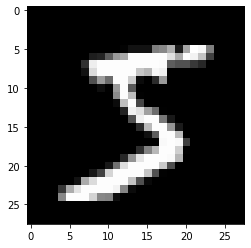

In [4]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# cmap="PiYG" -> "PiYG_r"
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [5]:
# 基底(Model): Sequential(一定是一層疊一層上面), Model(你想怎麼疊都可以)
# 層(Layer) : Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# bias: 每一層有多少個輸出, 就有多少個激活函式, 就有多少個bias
layers = [
    # 784 * 128 + 128(bias) = 100480
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias) = 1290
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 輸出一個(二元): ACT->sigmoid loss: binary crossentropy(plog1/q + (1-p)log1/(1-q))
# 輸出多個
# (多元互斥): ACT->softmax loss: categorical crossentropy(p1log1/q1 + p2log1/q2 + ...)
# (多元不互斥): 照二元選
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
import numpy as np
test = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
# -1: 某個位置讓他自己推測
test.reshape(3, 2)
test.reshape(3, -1)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [9]:
x_train_norm = x_train.reshape(60000, 784) / 255.0
x_test_norm = x_test.reshape(10000, 784) / 255.0

In [10]:
# batch_size: 看多少筆做一次梯度下降(把所有筆的斜率做一個平均)
# epochs: 整份(60000筆)妳總共看幾次
# validation_split: 切出多少%作為我的測試資料(10%)
# 270調整: (60000 * 0.9) / 200 -> 270 
# loss/accuracy: 54000筆訓練資料
# val_loss/val_accuracy: 6000筆測試資料
# !!! 看val_loss平滑下來->epochs
# !!! 過擬合: 不要無腦訓練下去(train loss會變低), 但你對於沒看過資料表現的並不會比較好(val loss變高)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
# 不想要進度條, verbose=2
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks)

Epoch 1/50
270/270 [==============================] - 4s 11ms/step - loss: 0.4413 - accuracy: 0.8788 - val_loss: 0.1979 - val_accuracy: 0.9488
Epoch 2/50
270/270 [==============================] - 3s 9ms/step - loss: 0.2058 - accuracy: 0.9414 - val_loss: 0.1467 - val_accuracy: 0.9608
Epoch 3/50
270/270 [==============================] - 3s 10ms/step - loss: 0.1527 - accuracy: 0.9561 - val_loss: 0.1192 - val_accuracy: 0.9678
Epoch 4/50
270/270 [==============================] - 3s 10ms/step - loss: 0.1220 - accuracy: 0.9649 - val_loss: 0.1089 - val_accuracy: 0.9695
Epoch 5/50
270/270 [==============================] - 3s 10ms/step - loss: 0.0991 - accuracy: 0.9718 - val_loss: 0.1038 - val_accuracy: 0.9702
Epoch 6/50
270/270 [==============================] - 3s 10ms/step - loss: 0.0837 - accuracy: 0.9762 - val_loss: 0.0913 - val_accuracy: 0.9765
Epoch 7/50
270/270 [==============================] - 2s 6ms/step - loss: 0.0709 - accuracy: 0.9805 - val_loss: 0.0858 - val_accuracy: 0.9755
E

In [11]:
# 用沒看過的一萬筆作最終評估
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9781


[0.07420232146978378, 0.9781000018119812]

In [27]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=1)
# y注意一下: tensorflow裡:y_train_cat 出了tensorflow:帶原本y_train
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(predict)".format(i) for i in range(10)],
      index=["{}(true)".format(i) for i in range(10)])

,0(predict),1(predict),2(predict),3(predict),4(predict),5(predict),6(predict),7(predict),8(predict),9(predict)
0(true),967,0,3,2,1,2,3,1,1,0
1(true),0,1123,3,1,0,1,2,2,3,0
2(true),2,3,1007,2,3,0,4,4,7,0
3(true),0,0,5,989,1,5,0,3,3,4
4(true),1,0,1,0,970,0,5,0,0,5
5(true),4,0,0,5,2,874,3,1,3,0
6(true),3,2,2,1,3,6,941,0,0,0
7(true),1,4,13,3,2,0,0,995,3,7
8(true),4,0,3,6,5,9,2,4,937,4
9(true),2,2,0,6,14,3,0,4,0,978


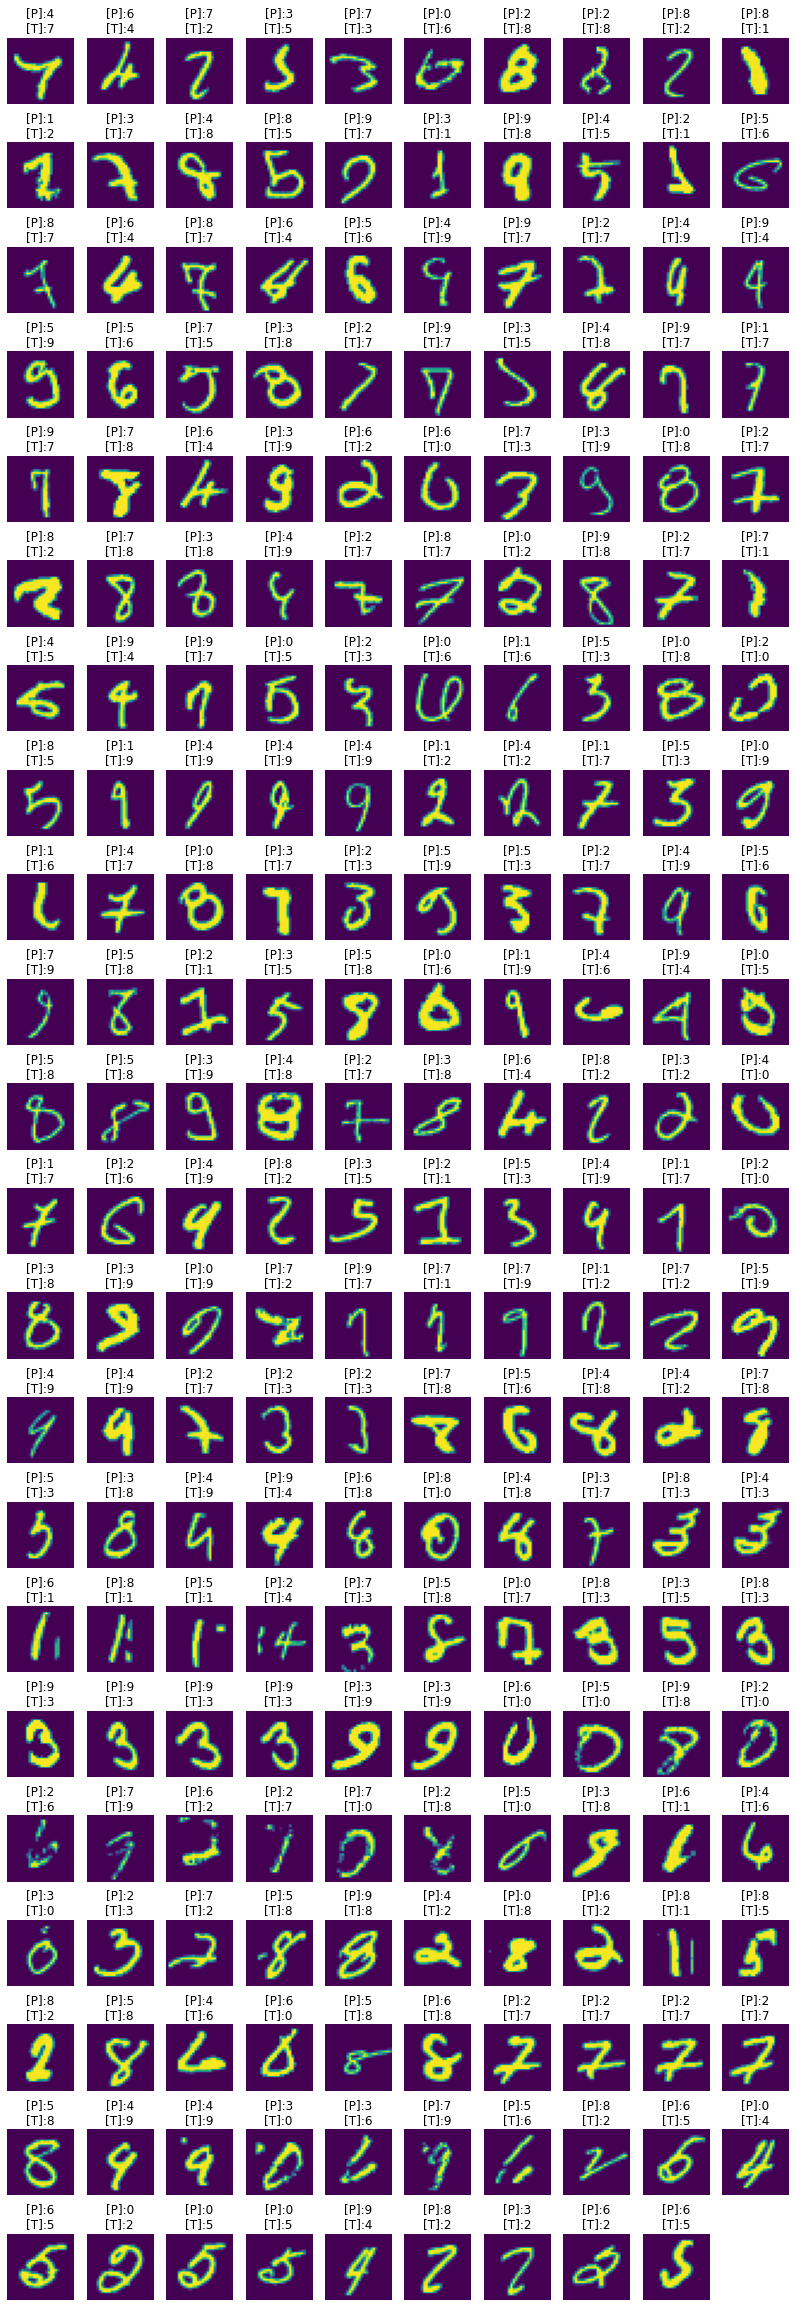

In [39]:
# subplot(總高度, 總寬度, ith[1,2,3])
# (2, 3, 1) (2, 3, 2) (2, 3, 3)
# (2, 3, 4) (2, 3, 5) (2, 3, 6)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 42))

idx = np.nonzero(pre != y_test)[0]

false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]

width = 10
height = len(idx) // width + 1

for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[T]:{}".format(false_pre[i], false_true[i])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])